## Tree Models with Hyper-parameters 

Link 1
https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree


https://stats.stackexchange.com/questions/152553/what-is-the-equivalent-of-the-complexity-parameter-rpart-in-r-in-python-for



In [2]:
import numpy as np 
import pandas as pd

In [3]:
def plot_confusion_matrix(cm):
    import matplotlib.pyplot as plt
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['<=50K','>50K']
    plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [4]:
data = pd.read_csv('adult_dataset.csv')

In [5]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
data['class'] = np.where(data['income']=='<=50K',0,1)
y = data['class']
X = data.drop(['class','income'],axis=1)

X

In [7]:
from sklearn import preprocessing


for i in range(0,X.shape[1]):
    if X.dtypes[i]=='object':
        le = preprocessing.LabelEncoder()
        X[X.columns[i]] = le.fit_transform(X[X.columns[i]])

In [8]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# tree_model = DecisionTreeClassifier(criterion = "gini", random_state = 100,
#                                max_depth=3, min_samples_leaf=5)

# clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
#                                  max_depth=3, min_samples_leaf=5)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)

print('Accuracy of DecisionTreeClassifier  on test is:',accuracy_score(y_test,tree_pred))


cm = confusion_matrix(y_test,tree_pred)

plot_confusion_matrix(cm)

Accuracy of DecisionTreeClassifier  on test is: 0.8096056995455104


Accuracy of DecisionTreeClassifier on test is: 0.8125537403267412


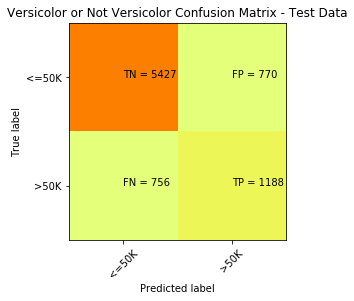

In [11]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy")

# tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)

print('Accuracy of DecisionTreeClassifier on test is:',accuracy_score(y_test,tree_pred))


cm = confusion_matrix(y_test,tree_pred)

plot_confusion_matrix(cm)

Accuracy of DecisionTreeClassifier  on test is: 0.8103427097408181


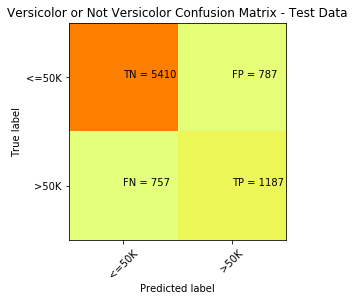

In [12]:
clf_entropy = DecisionTreeClassifier(min_samples_split=1000, # min observations for node
                                     min_samples_leaf=1000) # min observations for leaf node

# tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)

print('Accuracy of DecisionTreeClassifier  on test is:',accuracy_score(y_test,tree_pred))


cm = confusion_matrix(y_test,tree_pred)

plot_confusion_matrix(cm)

Accuracy of DecisionTreeClassifier on test is: 0.8121852352290874


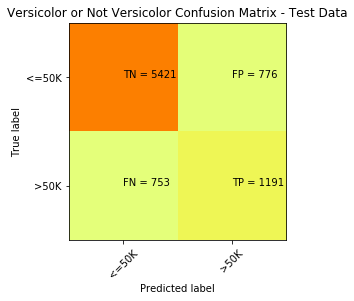

In [13]:
clf_entropy = DecisionTreeClassifier(min_samples_split=1,min_samples_leaf=1,)

# tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)

print('Accuracy of DecisionTreeClassifier on test is:',accuracy_score(y_test,tree_pred))


cm = confusion_matrix(y_test,tree_pred)

plot_confusion_matrix(cm)

Accuracy of DecisionTreeClassifier on test is: 0.8125537403267412


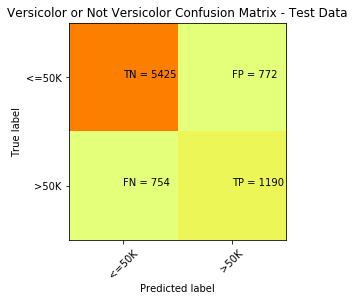

In [14]:
clf_entropy = DecisionTreeClassifier(min_samples_split=100,min_samples_leaf=20,max_features=4)

# tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)

print('Accuracy of DecisionTreeClassifier on test is:',accuracy_score(y_test,tree_pred))


cm = confusion_matrix(y_test,tree_pred)

plot_confusion_matrix(cm)